In [2]:
from sklearn.datasets import fetch_openml

Fetch the data     

In [4]:
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()            

C:\Users\Orefice\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
#Un jeu de données de Sickit-learn ont en général une structure de dictionnaire similaire
#Une clé DESCR décrivant le jeu de données
#Une clé data contenant un tableau avec une ligne par observation et une colonne par variable
#Une clé target contenant un tableau d'étiquettes

In [6]:
X, y = mnist["data"], mnist["target"]

In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [10]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [11]:
some_digit = X[0:1].to_numpy()
some_digit_image = some_digit.reshape(28,28)

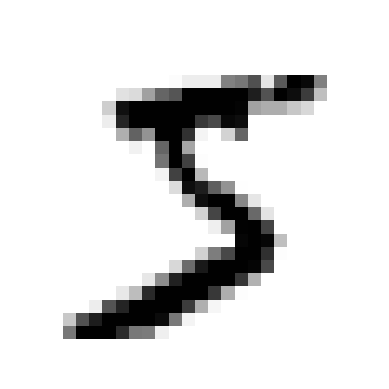

In [12]:
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [13]:
y_label = int(y[0])
print(y_label)

5


In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [15]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [16]:
unique_classes = np.unique(y_train)
print(unique_classes)

[0 1 2 3 4 5 6 7 8 9]


In [17]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
unique_classes = np.unique(y_train_5)
print(unique_classes)
unique_classes = np.unique(y_test_5)
print(unique_classes)

[False  True]
[False  True]


In [18]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [19]:
sgd_clf.predict(some_digit.reshape(1,-1))

C:\Users\Orefice\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [22]:
from sklearn.base import BaseEstimator
class Never5classifier(BaseEstimator):
    def fit(self, X, y= "None"):
        pass
    def predict(self,x):
        return np.zeros((len(x),1), dtype=bool)

In [23]:
never_5_clf = Never5classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.91125, 0.90855, 0.90915])

In [24]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Generate cross-validated estimates for each input data point
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

# Compute the confusion matrix
cm = confusion_matrix(y_train_5, y_train_pred)

print(cm)


[[53892   687]
 [ 1891  3530]]


In [25]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [26]:
from sklearn.metrics import precision_score, recall_score

In [27]:
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [28]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [29]:
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [30]:
y_scores = sgd_clf.decision_function(some_digit)
y_scores

C:\Users\Orefice\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [31]:
y_some_digit_pred = (y_scores > 8000)
y_some_digit_pred

array([False])

In [32]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,cv = 3, method = "decision_function")

In [33]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

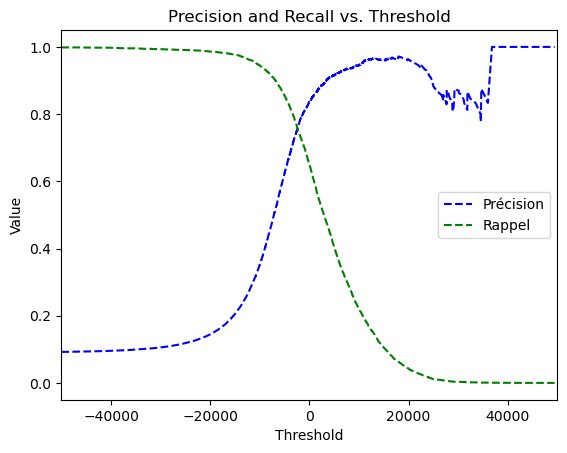

In [34]:
def plot_precision_recall_vs_treshold (precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Précision")
    plt.plot(thresholds, recalls[:-1], "g--", label = "Rappel")
    plt.xlim(-50000,50000)
    plt.xlabel("Threshold")
    plt.ylabel("Value")
    plt.title("Precision and Recall vs. Threshold")
    plt.legend()
plot_precision_recall_vs_treshold(precisions, recalls, thresholds)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


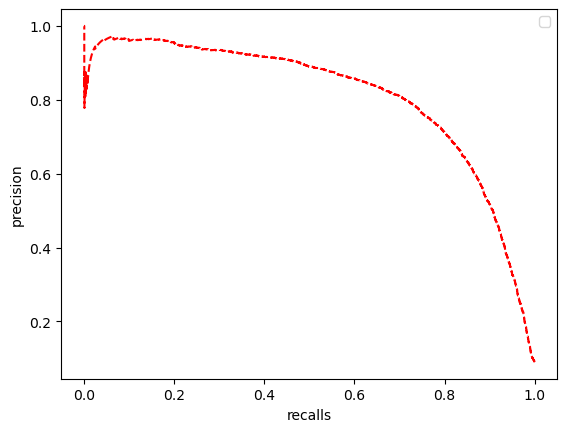

In [35]:
plt.plot(recalls[:-1], precisions[:-1], "r--")
plt.xlabel("recalls")
plt.ylabel("precision")
plt.legend()
plt.show()

In [36]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [37]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [38]:
#Une précision élevée est pas très utile si son rapelle est bas

In [39]:
print(y_scores)

[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]


In [40]:
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

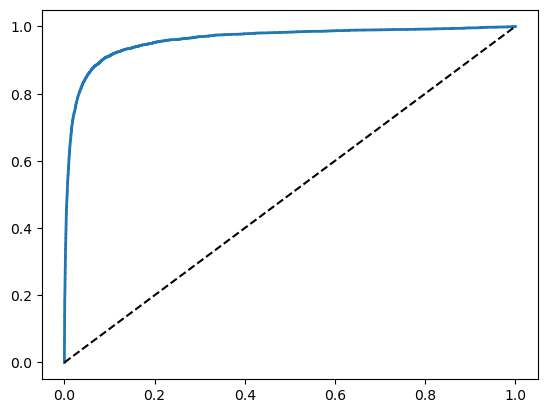

In [41]:
def plot_roc_curve(fpr = fpr, tpr = tpr, label = None):
    plt.plot(fpr,tpr,linewidth=2, label = label)
    plt.plot([0,1], [0,1], "k--")

plot_roc_curve()
plt.show()

In [42]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [49]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)

In [51]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]  # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

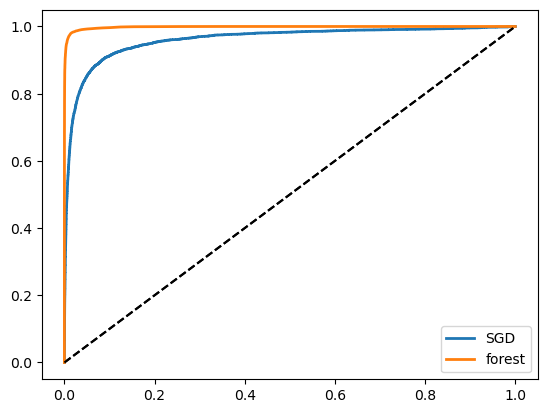

In [52]:
plot_roc_curve(label="SGD")
plot_roc_curve(tpr = tpr_forest, fpr = fpr_forest, label= "forest")
plt.legend()
plt.show()

In [57]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict(some_digit)

C:\Users\Orefice\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5])

In [67]:
some_digit_scores = svm_clf.decision_function(some_digit)
print(f"array decision => {some_digit_scores}")
print(f"result: {np.argmax(some_digit_scores)}")

array decision => [[ 1.72501977  2.72809088  7.2510018   8.3076379  -0.31087254  9.3132482
   1.70975103  2.76765202  6.23049537  4.84771048]]
result: 5


C:\Users\Orefice\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [69]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train,y_train)
ovr_clf.predict(some_digit)

C:\Users\Orefice\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Orefice\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Orefice\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Orefice\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Orefice\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Orefice\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with featu

array([5])

In [ ]:
len(ovr_clf.estimators_)

10

In [ ]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict(some_digit)

C:\Users\Orefice\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3])

In [ ]:
sgd_clf.decision_function(some_digit)

C:\Users\Orefice\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [86]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

array([0.8983, 0.891 , 0.9018])

In [88]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

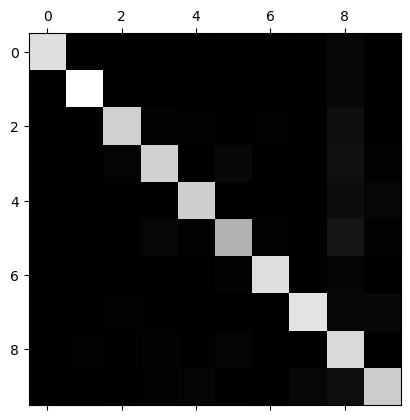

In [89]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

In [90]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx/row_sums

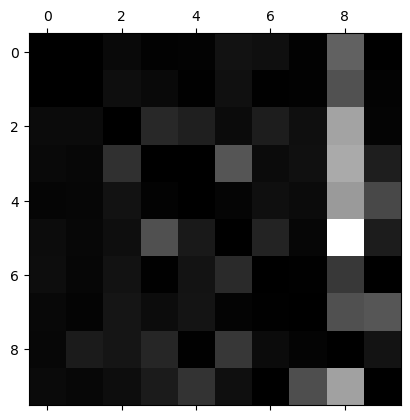

In [91]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

In [92]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2  == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [93]:
knn_clf.predict(some_digit)

C:\Users\Orefice\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [100]:
noise = np.random.randint(0,100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100, (len(X_test), 784))
X_test_mod = X_test + noise

In [110]:
y_train_mod = X_train
y_test_mod = X_test

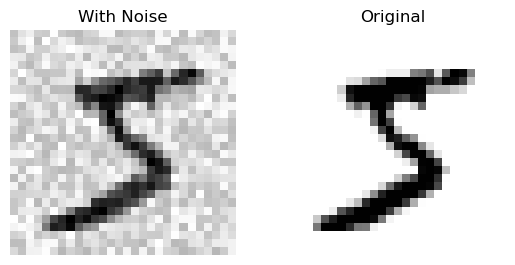

In [120]:
pictures_noises = X_train_mod[0:1].to_numpy().reshape(28,28)
pictures = X_train[0:1].to_numpy().reshape(28,28)

# Afficher les images
plt.subplot(1, 2, 1)  # Première sous-figure
plt.imshow(pictures_noises, cmap="binary")
plt.title("With Noise")
plt.axis("off")

plt.subplot(1, 2, 2)  # Deuxième sous-figure
plt.imshow(pictures, cmap="binary")
plt.title("Original")
plt.axis("off")

plt.show()

In [144]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

In [145]:
clean_digit = knn_clf.predict(X_test_mod[0:1])

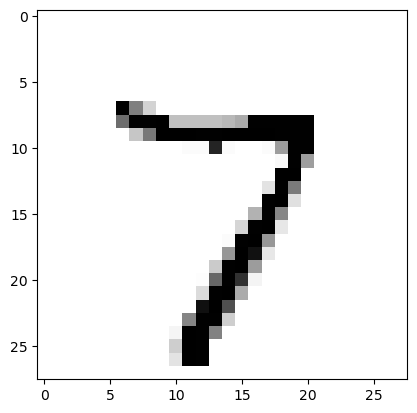

In [146]:
plt.imshow(clean_digit.reshape(28,28), cmap= "binary")
plt.show()

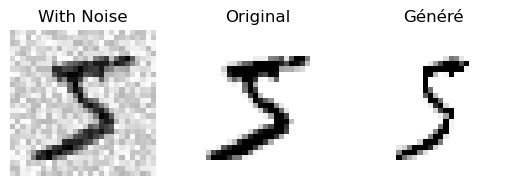

In [156]:
pictures_noises = X_train_mod[0:1].to_numpy().reshape(28,28)
pictures = X_train[0:1].to_numpy().reshape(28,28)
pictures_generated = knn_clf.predict(X_train_mod[0:1]).reshape(28,28)
# Afficher les images
plt.subplot(1, 3, 1)  # Première sous-figure
plt.imshow(pictures_noises, cmap="binary")
plt.title("With Noise")
plt.axis("off")

plt.subplot(1, 3, 2)  # Deuxième sous-figure
plt.imshow(pictures, cmap="binary")
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 3)  # Deuxième sous-figure
plt.imshow(pictures_generated, cmap="binary")
plt.title("Généré")
plt.axis("off")

plt.show()